# 1.0 Constructing a network of wikipedia vaccine page

## 1.2 Get the Data, Build the Network

In [ ]:
!pip install networkx==2.6.2
!pip install wikipedia
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=bfcfdcdbcdbed112696349300f8ce80b264c6c080c1d64ea06852f31b551f0a1
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
nx.__version__

'2.6.2'

In [ ]:
#https://en.wikipedia.org/wiki/Video_game

SEED = "Video game".title()
STOPS = ("International Standard Serial Number",
         "International Standard Book Number",
         "National Diet Library",
         "International Standard Name Identifier",
         "International Standard Book Number (Identifier)",
         "Pubmed Identifier", 
         "Pubmed Central",
         "Digital Object Identifier", 
         "Arxiv",
         "Proc Natl Acad Sci Usa", 
         "Bibcode",
         "Library Of Congress Control Number", 
         "Jstor",
         "Doi (Identifier)",
         "Isbn (Identifier)",
         "Pmid (Identifier)",
         "Arxiv (Identifier)",
         "Bibcode (Identifier)",
         "Issn (Identifier)")

In [ ]:
todo_lst = [(0, SEED)] # The SEED is in the layer 0
todo_set = set(SEED) # The SEED itself
done_set = set() # Nothing is done yet

g = nx.DiGraph()
layer, page = todo_lst[0]

%time
while layer < 2:
  # Remove the name page of the current page from the todo_lst, 
  # and add it to the set of processed pages. 
  # If the script encounters this page again, it will skip over it.
  del todo_lst[0]
  done_set.add(page)
  
  # Attempt to download the selected page.
  try:
    wiki = wikipedia.page(page)
  except:
    layer, page = todo_lst[0]
    print("Could not load", page)
    continue
  
  for link in wiki.links:
    link = link.title()
    if link not in STOPS and not link.startswith("List Of"):
      if link not in todo_set and link not in done_set:
        todo_lst.append((layer + 1, link))
        todo_set.add(link)
      g.add_edge(page, link)
  layer, page = todo_lst[0]

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
Could not load 1972 In Video Games
Could not load 1976 In Video Games
Could not load 1980S In Video Games
Could not load 1984 In Video Games
Could not load 2006 In Video Games
Could not load 2017 In Video Games
Could not load Asymmetric Gameplay
Could not load Battle Royale Game
Could not load Billboard (Magazine)
Could not load Dance Pad
Could not load Deathmatch


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Could not load Deck-Building Game
Could not load Distribution (Marketing)
Could not load Dreamhack
Could not load Entertainment Software Association
Could not load Falling-Sand Game
Could not load First-Person Shooter
Could not load Fog Of War
Could not load Gacha Game
Could not load Game
Could not load Gamepad
Could not load Glitch
Could not load Golden Age Of Arcade Video Games
Could not load Heads-Up Display (Video Games)
Could not load Health (Game Terminology)
Could not load Idea–Expression Distinction
Could not load John Hopkins Press
Could not load Loudspeaker
Could not load Mud
Could not load Mac Gaming
Could not load Marketing
Could not load Millennials
Could not load Mod (Video Gaming)
Could not load Nazi
Could not load Newzoo
Could not load Nimrod (Computer)
Could not load Non-Game
Could not load Online Game
Could not load Pdp-1
Could not load Port (Video Gaming)
Could not load Psychological Horror
Could not load Rogue (Video Game)
Could not load Roguelike
Could not load San

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

85749 nodes, 224493 edges


## 1.3 Eliminate Duplicates

In [ ]:
# make a copy of raw graph
original = g.copy()

# remove self loops
g.remove_edges_from(nx.selfloop_edges(g))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s") 
              for node in g if node + "s" in g
             ]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
    try:
      g = nx.contracted_nodes(g, *dup, self_loops=False)
    except:
      continue 

print(duplicates)

duplicates = [(x, y) for x, y in 
              [(node, node.replace("-", " ")) for node in g]
                if x != y and y in g]
print(duplicates)

for dup in duplicates:
  try:
    g = nx.contracted_nodes(g, *dup, self_loops=False)
  except:
    continue  

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(g, 0,"contraction")
nx.set_edge_attributes(g, 0,"contraction")

[('Video Game', 'Video Games'), ('Accelerometer', 'Accelerometers'), ('Action-Adventure Game', 'Action-Adventure Games'), ('Action Game', 'Action Games'), ('Action Role-Playing Game', 'Action Role-Playing Games'), ('Adventure Game', 'Adventure Games'), ('Advergame', 'Advergames'), ('Analog Stick', 'Analog Sticks'), ('Arcade Game', 'Arcade Games'), ("Beat 'Em Up", "Beat 'Em Ups"), ('Browser Game', 'Browser Games'), ('Cd-Rom', 'Cd-Roms'), ('Casual Game', 'Casual Games'), ('Christian Video Game', 'Christian Video Games'), ('City-Building Game', 'City-Building Games'), ('Computer Science', 'Computer Sciences'), ('Console Game', 'Console Games'), ('Console War', 'Console Wars'), ('Cutscene', 'Cutscenes'), ('Digital Camera', 'Digital Cameras'), ('Educational Video Game', 'Educational Video Games'), ('Electronic Game', 'Electronic Games'), ('Experience Point', 'Experience Points'), ('Fighting Game', 'Fighting Games'), ('First-Person Shooter', 'First-Person Shooters'), ('Flight Simulator', 'Fl

In [ ]:
print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))

85002 nodes, 220745 edges


## 1.4 Truncate the network

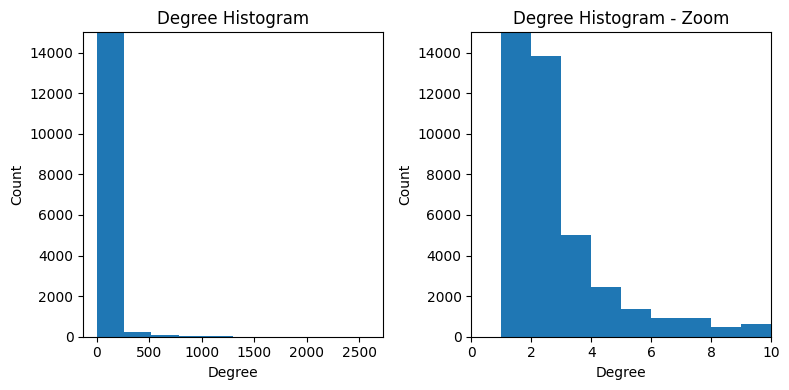

In [ ]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()

In [ ]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(g.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(g, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

27742 nodes, 163485 edges


In [ ]:
print("Nodes removed: {:.2f}%".format(100*(1 - 3195/13899)))
print("Edges removed: {:.2f}%".format(100*(1 - 13899/24105)))
print("Edges per nodes: {:.2f}".format(13899/3195))

Nodes removed: 77.01%
Edges removed: 42.34%
Edges per nodes: 4.35


## 1.5 Explore the network


<img width="600" src="https://drive.google.com/uc?export=view&id=1wq_xlTPrAXMkHKNeq6BuVEXwpece7yam">



In [ ]:
top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))

293 Arcade Game
284 Multiplayer Video Game
283 Video Game Genre
278 Role-Playing Video Game
269 Video Game
267 Fighting Game
267 First-Person Shooter
263 Online Game
261 Action Game
261 Browser Game
260 Platform Game
258 Shooter Game
258 Real-Time Strategy
258 Action-Adventure Game
254 Virtual Reality Game
253 Beat-'Em-Up
253 Massively-Multiplayer Online Game
252 Strategy Video Game
251 Interactive Fiction
251 Visual Novel
251 Adventure Game
250 Survival Horror
250 Simulation Video Game
249 Social-Network Game
249 Hack-And-Slash
248 Multiplayer Online Battle Arena
248 Action Role-Playing Game
247 Battle Royale Game
246 Stealth Game
245 Sports Video Game
245 Survival Game
245 Turn-Based Strategy
244 Tower Defense
244 4X
244 Casual Game
244 Audio Game
244 Tactical Role-Playing Game
244 Vehicle Simulation Game
244 Construction And Management Simulation
243 Life Simulation Game
243 Turn-Based Tactics
243 Lists Of Video Games
243 Real-Time Tactics
242 Interactive Film
242 Serious Game
242 H

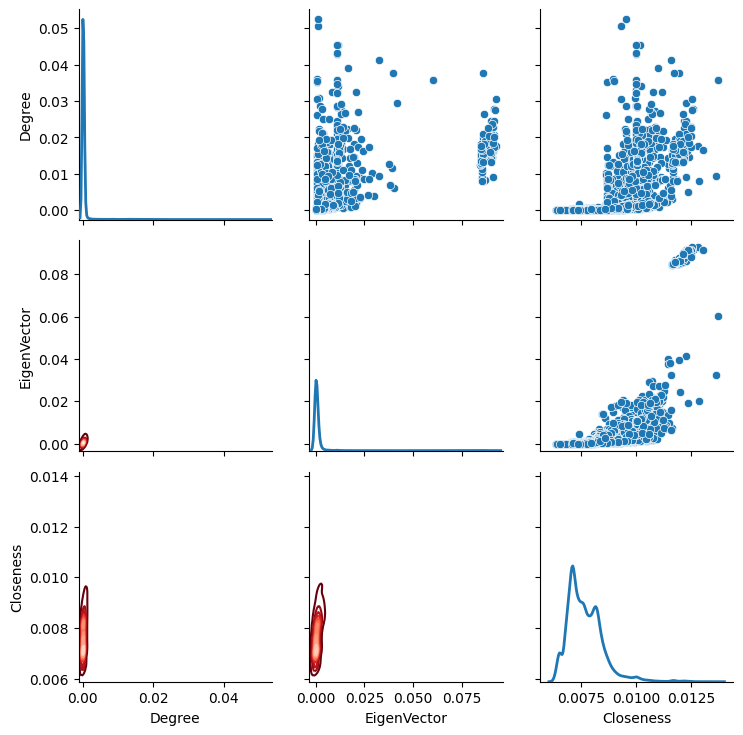

In [ ]:
#centralities
dc = pd.Series(nx.degree_centrality(gsub))
ec = pd.Series(nx.eigenvector_centrality(gsub))
cc = pd.Series(nx.closeness_centrality(gsub))

df = pd.DataFrame.from_dict({
                            "Degree": dc,
                            "EigenVector": ec,
                            "Closeness": cc})
df.reset_index(inplace=True,drop=True)
df.head()

fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.kdeplot, cmap="Reds_r")
fig.map_diag(sns.kdeplot, lw=2, legend=False)

plt.savefig('all.png', transparent=True,dpi=800,bbox_inches="tight")
plt.show()

In [ ]:
list(nx.k_core(gsub, 303))[0:10]

['Sim Racing',
 '2000 In Video Games',
 'Multiplayer Video Game',
 'Video Games In Greece',
 'Flight Simulator',
 'Aaa (Video Game Industry)',
 '1976 In Video Games',
 'Business Simulation Game',
 '1990 In Video Games',
 '4X']